https://stackoverflow.com/questions/77624974/calculate-smin-in-a-chinquared-linear-regression

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats

In [2]:
x = np.array([0. , 1. , 2. , 3. , 4. , 5.])
y = np.array([ 3.4 , 8.5 , 11.7 , 19.3 , 22.9 , 32.4])
sy = np.array([0.3 , 0.8 , 1.2 , 1.9 , 2.3 , 3.2])

In [3]:
def model(x, a, b):
    return a * x + b

In [14]:
popt, pcov = optimize.curve_fit(model, x, y, sigma=sy, absolute_sigma=True)

In [29]:
popt, np.sqrt(np.diag(pcov))

(array([5.02774364, 3.35561552]), array([0.30881918, 0.29016306]))

In [52]:
nu = x.size - 2
chi2 = np.sum(np.power((y - model(x, *popt))/sy, 2))
chi2n = chi2/nu
chi2, chi2n

(3.832172899902373, 0.9580432249755932)

In [45]:
law = stats.chi2(df=nu)

In [50]:
law.sf(chi2)

0.4291949692651329

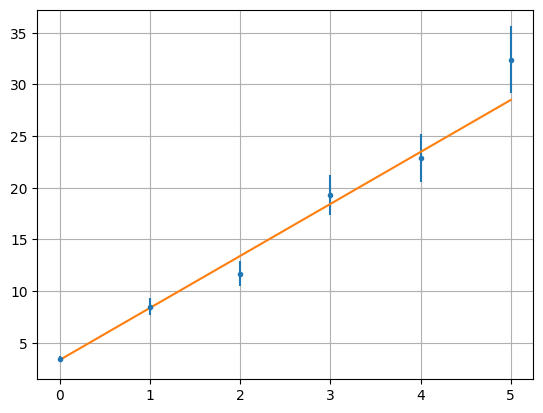

In [28]:
fig, axe = plt.subplots()
axe.errorbar(x, y, yerr=sy, linestyle="none", marker=".")
axe.plot(x, model(x, *popt))
axe.grid()

In [23]:
def getA(x, y, sigma_y):
    sigma_y_sq = sigma_y ** 2
    denominator = np.sum(1 / sigma_y_sq) * np.sum(x ** 2 / sigma_y_sq) - (np.sum(x / sigma_y_sq)) ** 2
    A = (np.sum(x * y / sigma_y_sq) * np.sum(1 / sigma_y_sq) - np.sum(y / sigma_y_sq) * np.sum(x / sigma_y_sq)) / denominator
    return A

def getB(x, y, sigma_y):
    sigma_y_sq = sigma_y ** 2
    denominator = np.sum(1 / sigma_y_sq) * np.sum(x ** 2 / sigma_y_sq) - (np.sum(x / sigma_y_sq)) ** 2
    B = (np.sum(y / sigma_y_sq) * np.sum(x ** 2 / sigma_y_sq) - np.sum(x / sigma_y_sq) * np.sum(x * y / sigma_y_sq)) / denominator
    return B

def getSigmaA(x, y, sigma_y):
    sigma_y_sq = sigma_y ** 2
    denominator = np.sum(1 / sigma_y_sq) * np.sum(x ** 2 / sigma_y_sq) - (np.sum(x / sigma_y_sq)) ** 2
    sigma_A = np.sqrt(np.sum(1 / sigma_y_sq) / denominator)
    return sigma_A

def getSigmaB(x, y, sigma_y):
    sigma_y_sq = sigma_y ** 2
    denominator = np.sum(1 / sigma_y_sq) * np.sum(x ** 2 / sigma_y_sq) - (np.sum(x / sigma_y_sq)) ** 2
    sigma_B = np.sqrt(np.sum(x ** 2 / sigma_y_sq) / denominator)
    return sigma_B

def get_sigma_min(x, f, sigma_f, a, b):
    residuals = f - (a * x + b)
    sigma_min = np.sqrt(np.sum(residuals ** 2) / (len(x) - 2))
    return sigma_min

# Input data
x = np.array([0., 1., 2., 3., 4., 5.])
f = np.array([3.4, 8.5, 11.7, 19.3, 22.9, 32.4])
sigma_f = np.array([0.3, 0.8, 1.2, 1.9, 2.3, 3.2])

# Calculate parameters A and B
A = getA(x, y, sy)
B = getB(x, y, sy)

# Calculate uncertainties for A and B 
sigma_A = getSigmaA(x, y, sy)
sigma_B = getSigmaB(x, y, sy)

# Calculate sigma_min
sigma_min = get_sigma_min(x, y, sy, A, B)

# Print results
print(f"Regression line parameters:")
print(f"A = {A:.2f}, B = {B:.2f}")
print(f"Uncertainties:")
print(f"sigma_A = {sigma_A:.2f}, sigma_B = {sigma_B:.2f}")
print(f"sigma_min = {sigma_min:.2f}")

Regression line parameters:
A = 5.03, B = 3.36
Uncertainties:
sigma_A = 0.31, sigma_B = 0.29
sigma_min = 2.19
